In [105]:
import numpy as np

from nn.model import Sequential
from nn.layers import Dense, WeightsLayer
from nn.activations import relu, tanh, sigmoid
from nn.losses import categorical_cross_entropy


nn = Sequential(
    input_shape = (None, 2),
    layers = [
        Dense(3, activation=tanh),
        Dense(1, activation=tanh),
    ]
)

In [104]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [106]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [107]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
# x = np.squeeze(x)
# y = np.squeeze(y)

In [108]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [92]:
def backprob(layer, error, alpha=0.01):

    dz = layer.activation(layer.z, derivative=True) * error
            
    dw = np.dot(dz, layer.input.T)
    db = np.sum(dz, axis=1, keepdims=True)
    
    new_error = np.dot(layer.weights.T, dz)
    return new_error, dw, db

In [93]:
y_hat = nn.forward(x[0].T)
print('y_hat:', y_hat)

dz2_ = mse_prime(y[0], y_hat)


dz2 = nn.weights.wl1.activation(nn.weights.wl1.z, derivative=True) * dz2_

print('loss:', dz2)        

da1 = np.dot(nn.weights.wl1.weights.T, dz2)
dz1 = nn.weights.wl0.activation(nn.weights.wl0.z, derivative=True) * da1
print('loss2:', dz1)    
dw1 = np.dot(dz1, nn.weights.wl0.input.T)
db1 = np.sum(dz1, axis=1, keepdims=True)
        
dw2 = np.dot(dz2, nn.weights.wl1.input.T)
db2 = np.sum(dz2, axis=1, keepdims=True)

print('dw1:', dw1)
print('db1:', db1)

print('dw2:', dw2)
print('db2:', db2)


y_hat: [[0.00224727]]
loss: [[0.00449451]]
loss2: [[ 0.00349345]
 [-0.00582556]
 [ 0.00219412]]
dw1: [[0. 0.]
 [0. 0.]
 [0. 0.]]
db1: [[ 0.00349345]
 [-0.00582556]
 [ 0.00219412]]
dw2: [[0.00290618 0.00298656 0.00378996]]
db2: [[0.00449451]]


In [95]:
y_hat = nn.forward(x[0].T)
print('y_hat:', y_hat)

loss = mse_prime(y[0], y_hat)
print('loss:', loss)

loss1, dw2, db2 = backprob(nn.weights.wl1, loss)

loss2, dw1, db1 = backprob(nn.weights.wl0, loss1)
print('loss2', loss1)

print('dw1:', dw1)
print('db1:', db1)

print('dw2:', dw2)
print('db2:', db2)

y_hat: [[0.00224727]]
loss: [[0.00449453]]
loss2 [[ 0.00600351]
 [-0.01043163]
 [ 0.00759363]]
dw1: [[0. 0.]
 [0. 0.]
 [0. 0.]]
db1: [[ 0.00349345]
 [-0.00582556]
 [ 0.00219412]]
dw2: [[0.00290618 0.00298656 0.00378996]]
db2: [[0.00449451]]


In [109]:

n_samples = 4
alpha = 0.1
n_epochs = 1000
errors = []
for epoch in range(n_epochs):
    er_ = []
    for x_i, y_i in zip(x, y):
          
        y_hat = nn.forward(x_i.T)
        print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        # error = categorical_cross_entropy(y_hat, y)
        loss = mse(y_i, y_hat)
        er_.append(loss.flatten())
        
        
        dz2_ = mse_prime(y_i, y_hat)
        
        dz2 = nn.weights.wl1.activation(nn.weights.wl1.z, derivative=True) * dz2_
        
        da1 = np.dot(nn.weights.wl1.weights.T, dz2)
        dz1 = nn.weights.wl0.activation(nn.weights.wl0.z, derivative=True) * da1
        
        dw1 = np.dot(dz1, nn.weights.wl0.input.T)
        db1 = np.sum(dz1, axis=1, keepdims=True)
        
        dw2 = np.dot(dz2, nn.weights.wl1.input.T)
        db2 = np.sum(dz2, axis=1, keepdims=True)
        
        nn.weights.wl0.weights -= alpha * dw1
        nn.weights.wl0.bias -= alpha * db1
        
        nn.weights.wl1.weights -= alpha * dw2
        nn.weights.wl1.bias -= alpha * db2
        
    errors.append(er_)  
    print("Epoch {}: Error - {}".format(epoch, loss))
        

 

<[[0 0]] | [[0]]> -> [[0.69763848]]
<[[0 1]] | [[1]]> -> [[0.60906387]]
<[[1 0]] | [[1]]> -> [[0.67203797]]
<[[1 1]] | [[0]]> -> [[0.71283409]]
Epoch 0: Error - 0.5081324447522721
<[[0 0]] | [[0]]> -> [[0.62925918]]
<[[0 1]] | [[1]]> -> [[0.51926798]]
<[[1 0]] | [[1]]> -> [[0.62173153]]
<[[1 1]] | [[0]]> -> [[0.67970173]]
Epoch 1: Error - 0.46199444247717475
<[[0 0]] | [[0]]> -> [[0.58541387]]
<[[0 1]] | [[1]]> -> [[0.46554611]]
<[[1 0]] | [[1]]> -> [[0.59490534]]
<[[1 1]] | [[0]]> -> [[0.66320674]]
Epoch 2: Error - 0.4398431815344014
<[[0 0]] | [[0]]> -> [[0.56435597]]
<[[0 1]] | [[1]]> -> [[0.44166882]]
<[[1 0]] | [[1]]> -> [[0.5827968]]
<[[1 1]] | [[0]]> -> [[0.65589533]]
Epoch 3: Error - 0.4301986888066132
<[[0 0]] | [[0]]> -> [[0.55552932]]
<[[0 1]] | [[1]]> -> [[0.43283979]]
<[[1 0]] | [[1]]> -> [[0.57730766]]
<[[1 1]] | [[0]]> -> [[0.65248792]]
Epoch 4: Error - 0.4257404811789196
<[[0 0]] | [[0]]> -> [[0.55183416]]
<[[0 1]] | [[1]]> -> [[0.43014574]]
<[[1 0]] | [[1]]> -> [[0.574

In [111]:
print(y.flatten())
print([nn.forward(x_i.T).flatten().tolist() for x_i in x])


[0 1 1 0]
[[0.0030512479642682833], [0.9592812960898602], [0.9588148896816733], [-0.0047817631311980685]]


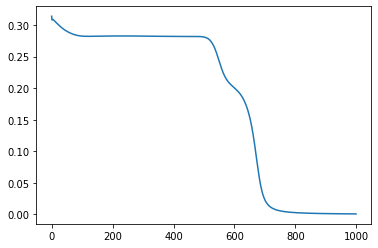

In [112]:
import matplotlib.pyplot as plt
mean_error = [np.mean(error_i) for error_i in errors]
plt.plot(range(0, n_epochs), mean_error)

In [21]:
nn.forward(x[1].T)

array([[0.97665015]])

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [29]:
print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Test shapes: {} | {}'.format(X_test.shape, y_test.shape))

print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (426, 30) | (426,)
Test shapes: (143, 30) | (143,)
Data example: 
 [1.382e+01 2.449e+01 9.233e+01 5.959e+02 1.162e-01 1.681e-01 1.357e-01
 6.759e-02 2.275e-01 7.237e-02 4.751e-01 1.528e+00 2.974e+00 3.905e+01
 9.680e-03 3.856e-02 3.476e-02 1.616e-02 2.434e-02 6.995e-03 1.601e+01
 3.294e+01 1.060e+02 7.880e+02 1.794e-01 3.966e-01 3.381e-01 1.521e-01
 3.651e-01 1.183e-01] -> 0


In [30]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
X_train = np.squeeze(x)
y_train = np.squeeze(y)

print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (4, 2) | (4,)
Data example: 
 [0 0] -> 0


In [31]:
nn = Sequential(InputLayer(2),
                Dense(2, activation=sigmoid),
                Dense(1, activation = sigmoid))

In [32]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [33]:
X_train[0].shape

(2,)

In [34]:
    
def backprob(error: np.ndarray, layer: WeightsLayer, alpha: float = 0.01):
    
    # error = error.reshape(-1, 1)
    # print('Weights before: {}'.format(layer.weights))
    dz = error * layer.activation(layer.z, derivative=True)
        
    dw = np.dot(dz.T, error)
    # dz = np.dot(activation_derivative.T, error)
    new_error = np.dot(dz, layer.weights)
    
    layer.weights -= alpha * dw
    layer.bias -= alpha * error
    # print('Weights after: {}'.format(layer.weights))
    
    # new_error = np.dot(activation_derivative, layer.weights)
    
    return new_error

In [35]:
alpha = 0.1
errors = []
bias = []
wl = list(nn.weights.__dict__.values())[:-1]
n_epochs = 1000
for epoch in range(n_epochs):
    errors_buffer = []
    b_buffer = []
    for x_i, y_i in zip(X_train ,y_train):
        y_hat = nn.forward(x_i)
        
        # print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        loss = mse(y_i, y_hat)
        
        errors_buffer.append(loss)

        error = y_hat - y_i
        for weight_layer in reversed(wl):
            # print(weight_layer)
            # print('<{}>'.format(weight_layer))
            error = backprob(error, weight_layer)
            b_buffer.append(weight_layer.bias)
    errors.append(errors_buffer)
    bias.append(b_buffer)
    print("Epoch {}: Error - {}".format(epoch, np.mean(errors_buffer)))
    
errors = np.squeeze(np.array(errors))

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [36]:
error.reshape(-1, 1)

array([[0.52587045],
       [0.52587045]])

In [37]:
errors[0]

IndexError: list index out of range

In [38]:
print(y_train)
print([nn.forward(x_i).tolist() for x_i in X_train])

[0 1 1 0]
[[[0.525870449641462, 0.525870449641462]], [[0.525873586140893, 0.5258705195059721]], [[0.5258721959462933, 0.5258735657376559]], [[0.5258753315547376, 0.5258736355668853]]]


In [39]:
import matplotlib.pyplot as plt

In [40]:
mean_error = [np.mean(error_i) for error_i in errors]

In [41]:
mean_error

[]

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

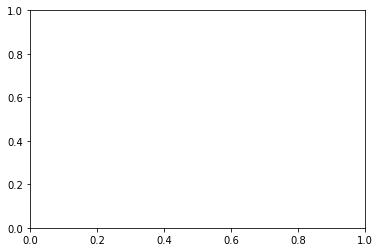

In [42]:
plt.plot(range(0, n_epochs), mean_error)

In [ ]:
bias[0]

[array([-4.59190213]),
 array([-1.46343601, -0.68889644]),
 array([-4.59190213]),
 array([-1.46343601, -0.68889644]),
 array([-4.59190213]),
 array([-1.46343601, -0.68889644]),
 array([-4.59190213]),
 array([-1.46343601, -0.68889644])]

In [19]:
import math
np.random.seed(0)
shape = (2, 3)
lower = -(np.sqrt(6.) / np.sqrt(shape[0] + shape[1]))
upper = np.sqrt(6.) / np.sqrt(shape[0] + shape[1])

weights = np.random.rand(*shape)
weights = lower + weights*(upper-lower)
weights



array([[ 0.10694503,  0.47145628,  0.22514328],
       [ 0.09833413, -0.16726395,  0.31963799]])

In [3]:
def foo(a):
    print('a: ->', a)
    return a+1

foo(2)

a: -> 2


3

In [18]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
x = np.squeeze(x)
y = np.squeeze(y)


In [42]:
list(nn.weights.__dict__.values())[:-1]

[(3,2) : <function tanh at 0x00000283FF09D360>,
 (1,3) : <function tanh at 0x00000283FF09D360>]

# Classification test

In [51]:
import matplotlib.pyplot as plt
import numpy as np

from nn.model import Sequential
from nn.layers import InputLayer, Dense, WeightsLayer
from nn.activations import relu, tanh
from nn.losses import categorical_cross_entropy, mean_squared_error, BinaryCrossEntropy

In [52]:
from nn.losses import mean_squared_error

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [55]:
print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Test shapes: {} | {}'.format(X_test.shape, y_test.shape))

print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (112, 4) | (112,)
Test shapes: (38, 4) | (38,)
Data example: 
 [6.7 3.1 4.7 1.5] -> 1


In [57]:
nn = Sequential(InputLayer(4),
                Dense(3, activation = relu),
                Dense(1, activation = tanh))

In [58]:

alpha = 0.01
errors = np.array([])
wl = list(nn.weights.__dict__.values())[:-1]
n = len(X_train)
for epoch in range(10):
    errors_buffer = []
    for x_i, y_i in zip(X_train[:n], y_train[:n]):
        y_hat = nn.forward(x_i)
        output_error = mean_squared_error(y_i, y_hat)
        errors_buffer.append(output_error)

        error = output_error
        for weight_layer in reversed(wl):
            # print('<{}>'.format(weight_layer))
            error = weight_layer.backward(error)
    errors = np.append(errors, errors_buffer, axis=0)
    print("Epoch {}: Error - {}".format(epoch, output_error))
    
    

Epoch 0: Error - 2.0
Epoch 1: Error - 2.0
Epoch 2: Error - 2.0
Epoch 3: Error - 2.0
Epoch 4: Error - 2.0
Epoch 5: Error - 2.0
Epoch 6: Error - 2.0
Epoch 7: Error - 2.0
Epoch 8: Error - 2.0
Epoch 9: Error - 2.0


In [60]:
y_hat = nn.forward(X_train[0])
print(y_hat, y_train[0])

def foo(y_true, y_pred):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

foo(y_train[0], y_hat)

# error_sum = 0
#     for ac, ex in zip(y_pred, y_true):
#         error_sum += (ac - ex)**2

[0.] 1


0.5

In [61]:
np.maximum(nn.weights.wl0.weights, 0.)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [62]:
y_test.reshape(1, -1)

array([[2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1]])

In [63]:
from nn.activations import apply_function_to_nparray

y_hat = np.array([])
for x_i in X_test:
    y_hat = np.append(y_hat, nn.forward(x_i))
  

print(y_hat)
y_hat = apply_function_to_nparray(y_hat, lambda value: 0 if value > 0 else 1)    


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
errors.shape

(1120,)

In [12]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_hat)
cm

array([[ 1, 11],
       [15,  3]], dtype=int64)

In [13]:
report = metrics.classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.21      0.17      0.19        18

    accuracy                           0.13        30
   macro avg       0.14      0.12      0.13        30
weighted avg       0.15      0.13      0.14        30



In [40]:
plt.plot(range(0, 70), errors[:70])

NameError: name 'plt' is not defined

## Activatioins test

In [1]:
from nn.activations import relu
from nn.losses import BinaryCrossEntropy
import numpy as np

In [2]:
a = np.array([1,-1, 2,-2, 3])
relu(a)

array([1., 0., 2., 0., 3.])

In [3]:
relu(a, derivative=True)

array([1., 0., 1., 0., 1.])

In [5]:
(a > 0) * 1.

array([1., 0., 1., 0., 1.])

In [31]:
np.tanh([0.9963555249786387, -0.5288796417702989])

array([ 0.76005932, -0.48452422])

In [60]:
Y_true = [1,1,2,2,4]  # Y_true = Y (original values)
  
# Calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4]
mean_squared_error(Y_true, Y_pred)

0.21606

In [113]:
from nn.utils import set_repr

In [114]:
@set_repr("increment")
def foo(a: int):
    return a + 1 

In [115]:
foo

increment

In [79]:
class Foo:
    
    def __repr__(self) -> str:
        return self.__class__.__name__
    

class Boo(Foo):
    
    pass

In [80]:
a = Boo()
a

Boo

In [6]:
import numpy as np

from nn.model import Sequential
from nn.layers import Dense, WeightsLayer
from nn.activations import relu, tanh, sigmoid
from nn.losses import categorical_cross_entropy

In [7]:
nn = Sequential(
    input_shape = (1, 2),
    layers = [
        Dense(3, activation=tanh),
        Dense(1, activation=tanh),
    ]
)

In [8]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [ ]:
from typing import Callable


weihts_initializator = Weights('weights_strategy') -> Callable_object (weights)

weights((3,2)) -> [[],[[]],...]